Размер Dataframe:  (10719, 24)
                        NaturalPersonID  ProductName  CreditSum TypeOfWork  \
0  1ABD801A-0580-4C4F-9682-E7E85A749981            1   500000.0        NaN   
1  7B427911-9B96-443E-9EBA-76A02515E1BE            1   708000.0        NaN   
2  4B867BD5-6398-4400-99CA-CF208714AF9A            1   665000.0        NaN   
3  ED654BFA-A7E7-4280-84CA-D6EAE80E45E2            1   458000.0        NaN   
4  CCA3FF37-D508-449E-869A-6ED4CB6F9943            1   969000.0        NaN   

   Employment SignIP  sex  age  EducationStatus  otrasl_rabotodatelya  ...  \
0           1    NaN    0   49                5                    18  ...   
1           2    NaN    0   44                3                     1  ...   
2           1    NaN    1   29                5                    18  ...   
3           1    NaN    0   59                6                    13  ...   
4           1    NaN    1   51                5                     2  ...   

   LivingRegionName  Residence 

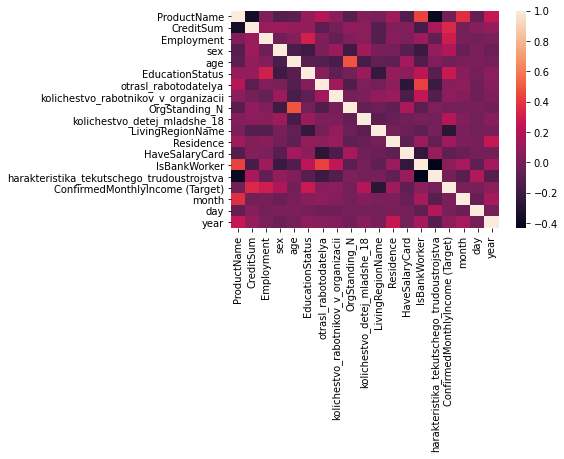

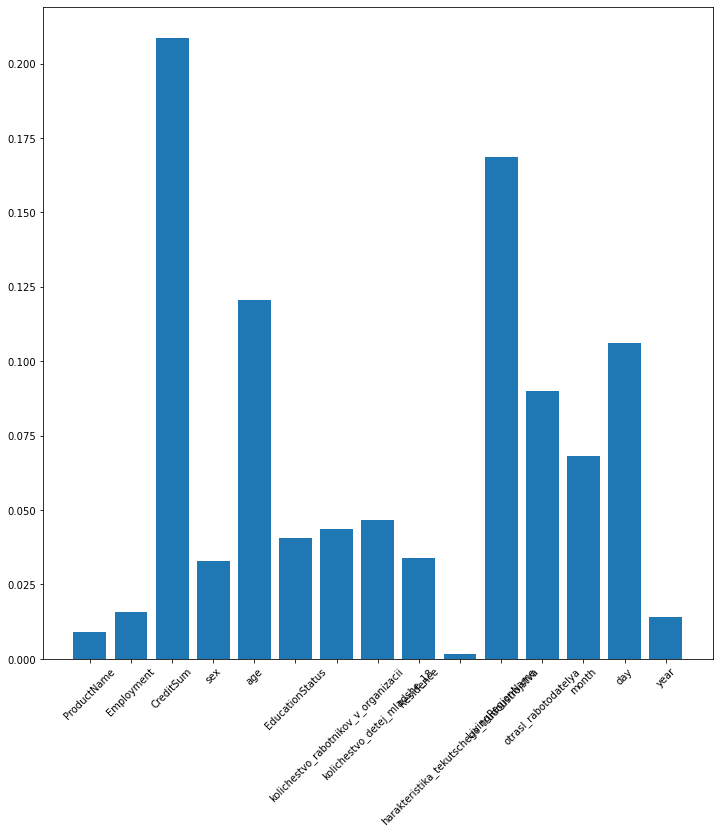


Gini classifier
MAE: 13948.29, RMSE: 21772.86, R2:    0.27 for linear model(test)
MAE: 13944.09, RMSE: 22834.41, R2:    0.34 for linear model(train)
MAE: 14163.34, RMSE: 23437.31, R2:    0.16 for tree model(test)


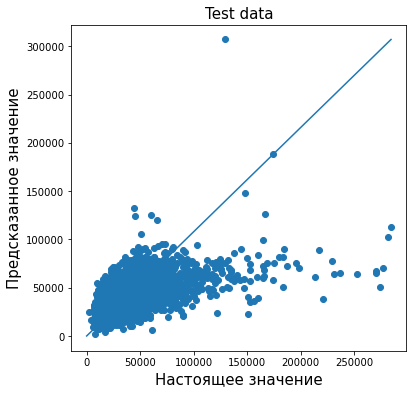

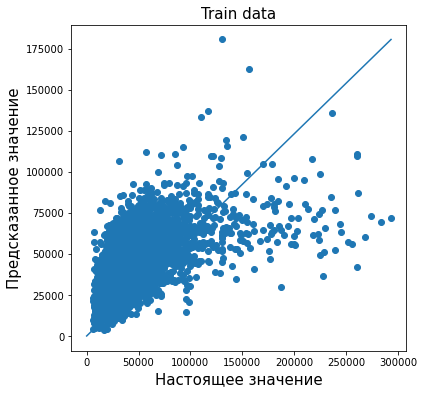

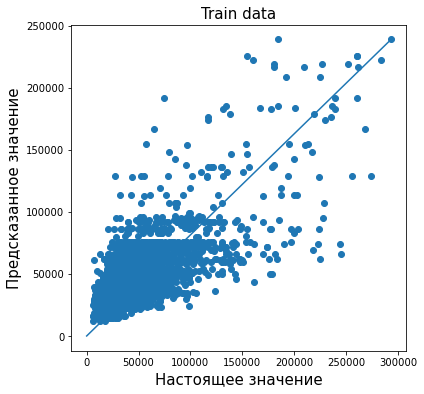

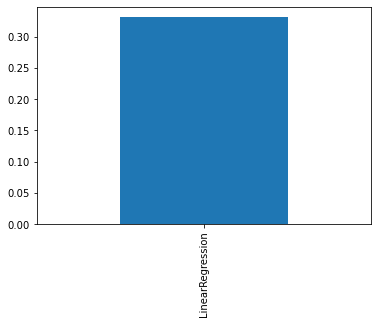

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

if __name__ == '__main__':
    data = pd.read_csv(r'D:\IIStudy\scientist_project\data\update_data.csv', delimiter=',')

    # Размер дата фрейма
    print('Размер Dataframe: ', data.shape)
    data.drop('Unnamed: 0', inplace=True, axis=1)
    print(data.head(5))

    # Получаем обобщенную информацию о DataFrame
    print('\n\nИнформация о Dataframe df.info():')
    print(data.info())

    numeric_data_with_target = ["ProductName", 'CreditSum', 'Employment', 'sex', 'age', 'EducationStatus',
                                'kolichestvo_rabotnikov_v_organizacii', 'OrgStanding_N', 'kolichestvo_detej_mladshe_18',
                                'Residence', 'HaveSalaryCard', 'IsBankWorker',
                                'harakteristika_tekutschego_trudoustrojstva', 'ConfirmedMonthlyIncome (Target)',
                                'LivingRegionName',
                                'otrasl_rabotodatelya',
                                'month', 'day', 'year'
                                ]

    numeric_data = ["ProductName", 'CreditSum', 'Employment', 'sex', 'age', 'EducationStatus',
                    'kolichestvo_rabotnikov_v_organizacii', 'OrgStanding_N', 'kolichestvo_detej_mladshe_18',
                    'Residence', 'HaveSalaryCard', 'IsBankWorker', 'harakteristika_tekutschego_trudoustrojstva',
                    'otrasl_rabotodatelya',
                    'LivingRegionName', 'month', 'day', 'year']

    numeric_data_test = ['ProductName', 'Employment', 'CreditSum', 'sex', 'age', 'EducationStatus',
                         'kolichestvo_rabotnikov_v_organizacii', 'OrgStanding_N', 'kolichestvo_detej_mladshe_18',
                         'Residence', 'IsBankWorker', 'harakteristika_tekutschego_trudoustrojstva', 'LivingRegionName',
                         'otrasl_rabotodatelya', 'month', 'day', 'year']

    print(data[numeric_data_test].info())

    sn.heatmap(data.corr())

    min_max_scaler = MinMaxScaler()
    data_norm = data[numeric_data_with_target].copy()
    data_norm = min_max_scaler.fit_transform(data_norm)

    data_norm = pd.DataFrame(data_norm, columns=data[numeric_data_with_target].columns)

    target_name = "ConfirmedMonthlyIncome (Target)"
    target = data[target_name]
    data_norm.drop(target_name, axis=1, inplace=True)

    data.drop(target_name, axis=1, inplace=True)

    corrCoef = data_norm.corr()

    corrField = []

    for i in corrCoef:
        for j in corrCoef.index[corrCoef[i] > 0.4]:
            if i != j and j not in corrField and i not in corrField:
                corrField.append(j)
    print(corrField)

    data_norm = data_norm[numeric_data_test].copy()
    data_norm.drop(corrField, axis=1, inplace=True)

    print(data_norm.describe().T)

    clf = RandomForestRegressor()
    clf.fit(data_norm, target)

    plt.figure(figsize=(12, 12))
    plt.bar(data_norm.columns, clf.feature_importances_)
    plt.xticks(rotation=45)
    plt.show()

    model_column = ["Employment", 'CreditSum', 'EducationStatus']

    data_norm['CreditSum'] = data_norm['CreditSum'].astype(str)

    data_train, data_test, target_values_train, target_values_test = train_test_split(data_norm,
                                                                                      target,
                                                                                      test_size=0.40, random_state=42)
    model_regressor = LinearRegression()
    model_regressor.fit(data_train, target_values_train)

    model_tree = DecisionTreeRegressor(max_depth=8, random_state=4, min_samples_leaf=2)
    model_tree.fit(data_train, target_values_train)

    print('\nGini classifier')

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model(test)".format(
        mean_absolute_error(target_values_test, model_regressor.predict(data_test)),
        mean_squared_error(target_values_test, model_regressor.predict(data_test)) ** 0.5,
        r2_score(target_values_test, model_regressor.predict(data_test))))

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model(train)".format(
        mean_absolute_error(target_values_train, model_regressor.predict(data_train)),
        mean_squared_error(target_values_train, model_regressor.predict(data_train)) ** 0.5,
        r2_score(target_values_train, model_regressor.predict(data_train))))

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for tree model(test)".format(
        mean_absolute_error(target_values_test, model_tree.predict(data_test)),
        mean_squared_error(target_values_test, model_tree.predict(data_test)) ** 0.5,
        r2_score(target_values_test, model_tree.predict(data_test))))

    plt.figure(figsize=(6, 6))
    plt.scatter(target_values_test, model_regressor.predict(data_test))
    plt.plot([0, max(target_values_test)], [0, max(model_regressor.predict(data_test))])
    plt.xlabel('Настоящее значение', fontsize=15)
    plt.ylabel('Предсказанное значение', fontsize=15)
    plt.title('Test data', fontsize=15)
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.scatter(target_values_train, model_regressor.predict(data_train))
    plt.plot([0, max(target_values_train)], [0, max(model_regressor.predict(data_train))])
    plt.xlabel('Настоящее значение', fontsize=15)
    plt.ylabel('Предсказанное значение', fontsize=15)
    plt.title('Train data', fontsize=15)

    plt.figure(figsize=(6, 6))
    plt.scatter(target_values_train, model_tree.predict(data_train))
    plt.plot([0, max(target_values_train)], [0, max(model_tree.predict(data_train))])
    plt.xlabel('Настоящее значение', fontsize=15)
    plt.ylabel('Предсказанное значение', fontsize=15)
    plt.title('Train data', fontsize=15)

    kfold = 5  # количество подвыборок для валидации
    itog_val = {}  # список для записи результатов кросс валидации разных алгоритмов

    scores = cross_val_score(model_regressor, data_train, target_values_train, cv=kfold)
    itog_val['LinearRegression'] = scores.mean()

    DataFrame.from_dict(data=itog_val, orient='index').plot(kind='bar', legend=False)

    plt.show()